# University of Oregon - Solar Radiation Monitoring Laboratory (SRML)

The University of Oregon's Solar Radiation Monitoring Laboratory (SRML) operates a network of station in the Northwestern United States.

This notebook will demonstrate how pvlib-python can be used to retrieve ground measured solar radiation data form the SRML network. The specific example extracts data from the Hermiston station for the month of June 2020.

The `pvlib.iotools.read_srml_month_from_solardat` function retrieves data from the SRML archive, which stores data in monthly files for each station. A list of the station abbreviations can be found [here](http://solardat.uoregon.edu/StationIDCodes.html).

In [1]:
import pvlib

In [2]:
df = pvlib.iotools.read_srml_month_from_solardat(
    station='HE',
    year=2020,
    month=6)

df.head()  # print the first 5 rows of data

,ghi_0,ghi_0_flag,dni_0,dni_0_flag,dhi_3,dhi_3_flag,ghi_2,ghi_2_flag,dni_2,dni_2_flag,...,relative_humidity_1,relative_humidity_1_flag,9151,9151_flag,wind_dir_1,wind_dir_1_flag,wind_speed_1,wind_speed_1_flag,dhi_0,dhi_0_flag
2020-06-01 00:00:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.3,12,0.0,11,172.5,11,1.3,12,0,71
2020-06-01 00:01:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.5,12,0.0,11,180.7,11,1.3,12,0,71
2020-06-01 00:02:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,128.9,11,0.4,12,0,71
2020-06-01 00:03:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.4,12,0.0,11,141.6,11,1.2,12,0,71
2020-06-01 00:04:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,186.3,11,0.8,12,0,71


The output above shows the first five rows of the extracted data. We can now plot the parameters of interest, e.g., the three components of solar radiation; GHI, DNI, and DHI.

Text(0, 0.5, 'DHI [W/m$^2$]')

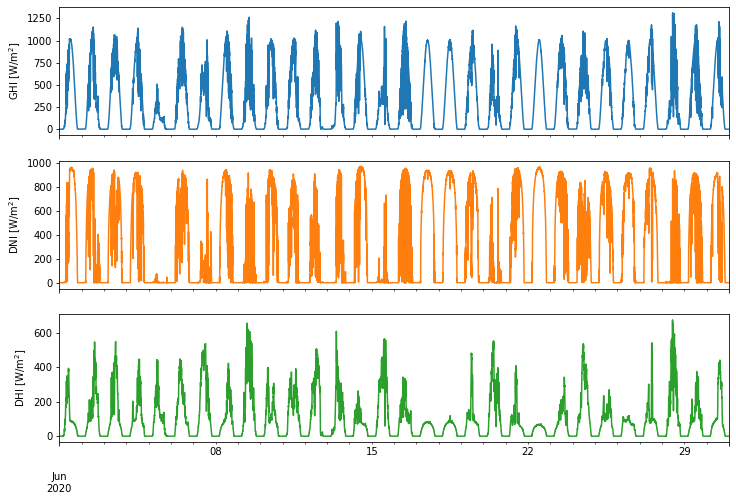

In [3]:
axes = df[['ghi_0', 'dni_0', 'dhi_3']].plot(subplots=True, figsize=(12,8), sharex=True, rot=0, legend=False)
axes[0].set_ylabel('GHI [W/m$^2$]')
axes[1].set_ylabel('DNI [W/m$^2$]')
axes[2].set_ylabel('DHI [W/m$^2$]')

## Future updates
It is planned to update the SRML pvlib retrieval function to access the newest version of the SRML data format in order for metadata also to be available. Also, it is planned for the new function to accept a start and end date to get more than one month of data for a single station.